# Движение частицы в поле плоского конденсатора

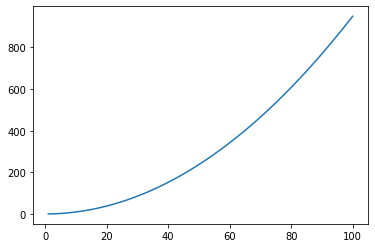

In [22]:
import numpy as np
import matplotlib.pyplot as plt


g = 9.81


def x(t):
    return V_0 * t


def y(t):
    return a * t ** 2 / 2


V_0 = 1
q = -10
m = 1
U = 1
d = 1

a = -g - (q * U) / (m * d)

t = np.linspace(1, 100, 100)

plt.plot(x(t), y(t))
plt.show()

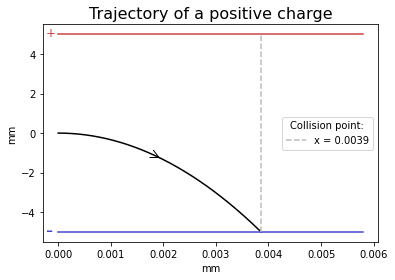

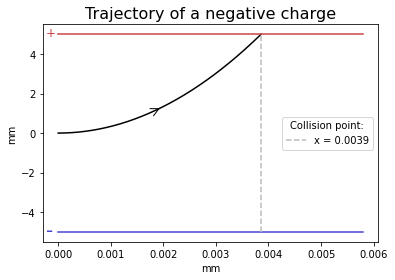

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from decimal import Decimal


g = 9.81  # g = const


def add_arrow(line):
    color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    start_ind = np.argmin(np.absolute(xdata - xdata.mean()))
    end_ind = start_ind + 1

    line.axes.annotate("",
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=20
    )


def add_mark(line, type_):
    line.axes.annotate(type_,
        xy=(0, negative_plate_coord if type_ == "-" else positive_plate_coord),
        xytext=((-12, -4) if type_ == "-" else (-12, -2)),
        textcoords="offset pixels",
        size=(20 if type_ == "-" else 12),
        color=("#4444CC" if type_ == "-" else "#CC4444")
    )


def x(t):
    return V_0 * t


def y(t):
    return (-g - (q * U) / (m * d)) * t ** 2 / 2


def collision_time():
    return d * np.sqrt(m) / np.sqrt(d * g * m + q * U) if q > 0 else d * np.sqrt(m) / np.sqrt(-d * g * m - q * U)


def create_plot(title):
    plt.title(title, size=16)
    plt.xlabel("mm")
    plt.ylabel("mm")
    t_final = collision_time()
    t = np.linspace(0, t_final, 1000)

    line = plt.plot(x(t), y(t), c="#000000")[0]
    add_arrow(line)

    t = np.linspace(0, t_final * 1.5, 2)
    negative = plt.plot(x(t), (negative_plate_coord, negative_plate_coord), c="#4444CC")[0]
    positive = plt.plot(x(t), (positive_plate_coord, positive_plate_coord), c="#CC4444")[0]
    add_mark(negative, "-")
    add_mark(positive, "+")

    dash = plt.plot((x(t_final), x(t_final)),
        (negative_plate_coord, positive_plate_coord),
        c="#BBBBBB",
        linestyle="--",
        label=f"x = {x(t_final):.2}"
    )[0]

    plt.legend(handles=[dash], title="Collision point:")

    plt.show()


V_0 = 6_000_000_000  # mm/s
q = 10 ** (-6)  # C
m = 9.1 * 10 ** (-31)  # kg
U = 220  # V
d = 10  # mm
q = abs(q)
fontprops = fm.FontProperties(size=12)
positive_plate_coord = d / 2
negative_plate_coord = -d / 2

# positive plot
create_plot("Trajectory of a positive charge")

# positive plot
q = -q
create_plot("Trajectory of a negative charge")

